In [1]:
from pathlib import Path 
import numpy as np
import seaborn as sns
import pandas as pd    
from matplotlib import pyplot as plt 
import sys 

sys.path.insert(0, "/home/t-eliass/miso_sm")
from scripts.leven import run_main, run_main_two_groups

In [2]:
from collections import defaultdict 

def get_df(root_path, gold_path, train_path, fxn_of_interest="FindManager"):
    data = defaultdict(lambda: defaultdict(list))
    for path in root_path.glob(f"{fxn_of_interest}_*_seed/*_100/"):
        setting = path.name
        pred_path = path.joinpath("translate_output/test_valid.tgt")

        train_path = f"/home/t-eliass/resources/data/smcalflow_samples_curated/{fxn_of_interest}/{setting}/train.tgt"
        if not pred_path.exists():
            continue

        out_path = f"/home/t-eliass/scratch/levenshtein_output/{fxn_of_interest}/{setting}/"
        out_path = Path(out_path)
        out_path.mkdir(parents=True, exist_ok = True)
        correct_dist, incorrect_dist = run_main_two_groups(gold_path, pred_path, train_path, out_path, fxn_of_interest, do_anonymize=True)
        data[setting]["correct"].append(correct_dist)
        data[setting]["incorrect"].append(incorrect_dist)

    return data

In [3]:
def get_correct_incorrect(root_path, fxn_of_interest = "FindManager"):
    root_path = Path(root_path)
    fm_df = get_df(root_path, "/home/t-eliass/resources/data/smcalflow.agent.data/test_valid.tgt", "/home/t-eliass/resources/data/smcalflow.agent.data/train.tgt", fxn_of_interest=fxn_of_interest)

    correct_df = pd.DataFrame(columns=["setting", "order", "distance", "type"], dtype=float)
    incorrect_df = pd.DataFrame(columns=["setting", "order", "distance", "type"], dtype=float)

    def get_order(key):
        k1, k2 = key.split("_")
        if k1 == "max":
            val = np.inf
        else:
            val = int(k1)
        k2 = int(k2)
        return val + k2


    for setting in fm_df.keys():
        # TODO: change later 
        if setting.split("_")[1] != "100":
            continue
        correct_list = fm_df[setting]["correct"]
        incorrect_list = fm_df[setting]["incorrect"]
        for c in correct_list:
            correct_df = correct_df.append({"setting": setting, "order": get_order(setting), "distance": c, "type": "correct"}, ignore_index=True)
        for c in incorrect_list:
            incorrect_df = incorrect_df.append({"setting": setting, "order": get_order(setting), "distance": c, "type": "incorrect"}, ignore_index=True)
        
    total_df = pd.concat([correct_df, incorrect_df])

    correct_df = correct_df.sort_values(['order']).reset_index(drop=True)
    incorrect_df = incorrect_df.sort_values(['order']).reset_index(drop=True)
    total_df = total_df.sort_values(['order']).reset_index(drop=True)
    return correct_df, incorrect_df, total_df 

def plot(total_df, title):
    # #, columns = ["setting", "percent error"])
    fig, ax = plt.subplots()
    sns.lineplot(data=total_df, x = "setting", y = "distance", ax = ax, hue="type")
    sns.despine()
    # sns.lineplot(data=incorrect_df, x = "setting", y = "distance", ax = ax, color="b")
    plt.xticks(rotation=45)
    plt.title(title)

In [4]:
# correct_df, incorrect_df, min_pair_total_df = get_correct_incorrect("/home/t-eliass/amlt_models/transformer_min_pair_generated_v100/") 
correct_df, incorrect_df, base_total_df = get_correct_incorrect("/home/t-eliass/amlt_models/transformer/") 

Getting Levenshtein for 43 X 100 = 4300 examples


43it [00:03, 12.16it/s]


Getting Levenshtein for 53 X 100 = 5300 examples


53it [00:04, 12.10it/s]


Getting Levenshtein for 50 X 100 = 5000 examples


50it [00:04, 12.19it/s]


Getting Levenshtein for 46 X 100 = 4600 examples


46it [00:03, 12.11it/s]


Getting Levenshtein for 52 X 100 = 5200 examples


52it [00:04, 12.16it/s]


Getting Levenshtein for 44 X 100 = 4400 examples


44it [00:04, 10.74it/s]


Getting Levenshtein for 44 X 100 = 4400 examples


44it [00:03, 11.94it/s]


Getting Levenshtein for 52 X 100 = 5200 examples


52it [00:04, 11.78it/s]


Getting Levenshtein for 47 X 100 = 4700 examples


47it [00:04, 11.62it/s]


Getting Levenshtein for 49 X 100 = 4900 examples


49it [00:04, 11.95it/s]


Getting Levenshtein for 45 X 100 = 4500 examples


45it [00:03, 12.08it/s]


Getting Levenshtein for 51 X 100 = 5100 examples


51it [00:04, 11.58it/s]


Getting Levenshtein for 44 X 100 = 4400 examples


44it [00:03, 11.76it/s]


Getting Levenshtein for 52 X 100 = 5200 examples


52it [00:04, 11.71it/s]


Getting Levenshtein for 47 X 100 = 4700 examples


47it [00:03, 12.04it/s]


Getting Levenshtein for 49 X 100 = 4900 examples


49it [00:04, 11.91it/s]


Getting Levenshtein for 51 X 100 = 5100 examples


51it [00:04, 11.87it/s]


Getting Levenshtein for 45 X 100 = 4500 examples


45it [00:03, 11.87it/s]


Getting Levenshtein for 58 X 100 = 5800 examples


58it [00:04, 11.94it/s]


Getting Levenshtein for 38 X 100 = 3800 examples


38it [00:03, 11.83it/s]


Getting Levenshtein for 50 X 100 = 5000 examples


50it [00:04, 11.89it/s]


Getting Levenshtein for 46 X 100 = 4600 examples


46it [00:03, 11.81it/s]


Getting Levenshtein for 48 X 100 = 4800 examples


48it [00:04, 11.96it/s]


Getting Levenshtein for 48 X 100 = 4800 examples


48it [00:04, 11.31it/s]


Getting Levenshtein for 41 X 100 = 4100 examples


41it [00:03, 12.23it/s]


Getting Levenshtein for 55 X 100 = 5500 examples


55it [00:04, 12.03it/s]


Getting Levenshtein for 50 X 100 = 5000 examples


50it [00:04, 12.23it/s]


Getting Levenshtein for 46 X 100 = 4600 examples


46it [00:03, 12.09it/s]


Getting Levenshtein for 52 X 100 = 5200 examples


52it [00:04, 12.17it/s]


Getting Levenshtein for 44 X 100 = 4400 examples


44it [00:03, 12.07it/s]


Getting Levenshtein for 51 X 100 = 5100 examples


51it [00:04, 12.11it/s]


Getting Levenshtein for 45 X 100 = 4500 examples


45it [00:03, 12.02it/s]


Getting Levenshtein for 47 X 100 = 4700 examples


47it [00:03, 12.16it/s]


Getting Levenshtein for 49 X 100 = 4900 examples


49it [00:04, 11.97it/s]


Getting Levenshtein for 48 X 100 = 4800 examples


48it [00:03, 12.22it/s]


Getting Levenshtein for 48 X 100 = 4800 examples


48it [00:03, 12.11it/s]


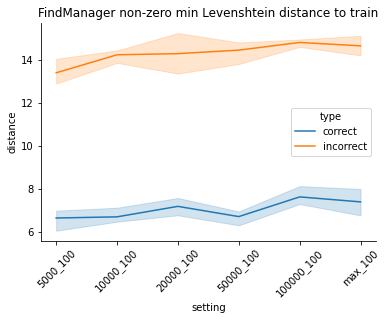

In [5]:
# plot(min_pair_total_df, "FindManager Min Pair Minimum Levenshtein distance to a training example") 
plot(base_total_df, "FindManager non-zero min Levenshtein distance to train") 

In [6]:
correct_df, incorrect_df, tomorrow_total_df = get_correct_incorrect("/home/t-eliass/amlt_models/transformer/", fxn_of_interest="Tomorrow") 

Getting Levenshtein for 217 X 100 = 21700 examples


217it [00:14, 14.57it/s]


Getting Levenshtein for 211 X 100 = 21100 examples


211it [00:14, 14.39it/s]


Getting Levenshtein for 250 X 100 = 25000 examples


250it [00:17, 14.67it/s]


Getting Levenshtein for 178 X 100 = 17800 examples


178it [00:12, 14.42it/s]


Getting Levenshtein for 276 X 100 = 27600 examples


276it [00:19, 14.42it/s]


Getting Levenshtein for 152 X 100 = 15200 examples


152it [00:10, 14.40it/s]


Getting Levenshtein for 272 X 100 = 27200 examples


272it [00:18, 14.35it/s]


Getting Levenshtein for 156 X 100 = 15600 examples


156it [00:10, 14.30it/s]


Getting Levenshtein for 293 X 100 = 29300 examples


293it [00:20, 14.48it/s]


Getting Levenshtein for 135 X 100 = 13500 examples


135it [00:09, 14.42it/s]


Getting Levenshtein for 257 X 100 = 25700 examples


257it [00:17, 14.51it/s]


Getting Levenshtein for 171 X 100 = 17100 examples


171it [00:12, 14.12it/s]


Getting Levenshtein for 216 X 100 = 21600 examples


216it [00:14, 14.57it/s]


Getting Levenshtein for 212 X 100 = 21200 examples


212it [00:14, 14.42it/s]


Getting Levenshtein for 247 X 100 = 24700 examples


247it [00:17, 14.16it/s]


Getting Levenshtein for 181 X 100 = 18100 examples


181it [00:12, 14.36it/s]


Getting Levenshtein for 272 X 100 = 27200 examples


272it [00:18, 14.35it/s]


Getting Levenshtein for 156 X 100 = 15600 examples


156it [00:10, 14.30it/s]


Getting Levenshtein for 267 X 100 = 26700 examples


267it [00:18, 14.37it/s]


Getting Levenshtein for 161 X 100 = 16100 examples


161it [00:11, 14.38it/s]


Getting Levenshtein for 280 X 100 = 28000 examples


280it [00:19, 14.58it/s]


Getting Levenshtein for 148 X 100 = 14800 examples


148it [00:10, 14.40it/s]


Getting Levenshtein for 264 X 100 = 26400 examples


264it [00:18, 14.39it/s]


Getting Levenshtein for 164 X 100 = 16400 examples


164it [00:11, 14.22it/s]


Getting Levenshtein for 218 X 100 = 21800 examples


218it [00:15, 14.49it/s]


Getting Levenshtein for 210 X 100 = 21000 examples


210it [00:14, 14.19it/s]


Getting Levenshtein for 257 X 100 = 25700 examples


257it [00:17, 14.58it/s]


Getting Levenshtein for 171 X 100 = 17100 examples


171it [00:11, 14.41it/s]


Getting Levenshtein for 270 X 100 = 27000 examples


270it [00:18, 14.67it/s]


Getting Levenshtein for 158 X 100 = 15800 examples


158it [00:10, 14.62it/s]


Getting Levenshtein for 285 X 100 = 28500 examples


285it [00:19, 14.81it/s]


Getting Levenshtein for 143 X 100 = 14300 examples


143it [00:09, 14.79it/s]


Getting Levenshtein for 266 X 100 = 26600 examples


266it [00:17, 14.86it/s]


Getting Levenshtein for 162 X 100 = 16200 examples


162it [00:11, 14.71it/s]


Getting Levenshtein for 290 X 100 = 29000 examples


290it [00:19, 14.76it/s]


Getting Levenshtein for 138 X 100 = 13800 examples


138it [00:09, 14.70it/s]


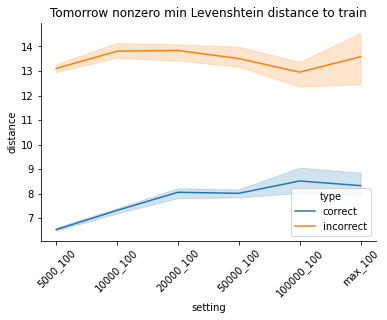

In [7]:
plot(tomorrow_total_df, "Tomorrow nonzero min Levenshtein distance to train") 

In [ ]:
def get_df_total(root_path,  fxn_of_interest=None):
    pred_path = root_path.joinpath("translate_output/test_valid.tgt")
    gold_path = "/home/t-eliass/resources/data/smcalflow.agent.data/test_valid.tgt"
    train_path = f"/home/t-eliass/resources/data/smcalflow.agent.data/train.tgt"
    correct_dist, incorrect_dist = run_main(gold_path, pred_path, train_path, fxn_of_interest)

    return correct_dist, incorrect_dist 

def get_correct_incorrect_total(root_path):
    root_path = Path(root_path)
    correct_dist, incorrect_dist = get_df_total(root_path, fxn_of_interest=None)

    print(f"Average correct distance: {np.mean(correct_dist)}")
    print(f"Average incorrect distance: {np.mean(incorrect_dist)}")


In [ ]:
get_correct_incorrect_total("/home/t-eliass/amlt_models/transformer_full/")